# 随机生成一个协方差矩阵

对于任意一个矩阵$A$，构造$A^TA$就可以得到一个半正定矩阵。这是因为$B$半正定等价于

$$
X^T B X \neq 0 \ge 0 \quad \forall X \in R^n
$$

而显然

$$
X^T A^T A X = (AX)^T AX = y_1^2 + y_2^2 + \cdots + y_n^2 \ge 0 
$$

其中$y_i = AX_i = \sum_{j=1}^n A_{ij}X_{j}$

所以我们可以随便生成一个矩阵，如每个格按均匀分布生成，然后按以上方法构造即可。这个方法以概率1得到一个满秩的半正定矩阵，也就是正定矩阵。

如果我们想要不满秩的半正定矩阵。可以构造$A^T \Lambda A$，其中$\Lambda$是对角矩阵。而$A$是满秩的任意矩阵。从满秩矩阵不改变乘积的秩，
我们知道这个在秩上可以满足其总等于$\Lambda$的秩。而由$\Lambda$的对角矩阵性，我们可以作

$$
X^T A^T \Lambda A X = 
X^T A^T (\Lambda^{\frac{1}{2}})^T \Lambda^{\frac{1}{2}} A X = 
(\Lambda^{\frac{1}{2}} A X)^T (\Lambda^{\frac{1}{2}} A X )= 
\sum_{i=1}^n z_i^2 \ge 0
$$

上述矩阵的对称性是显然的,$(A^T \Lambda A)^T = A^T \Lambda^T (A^T)^T = A^T \Lambda A$。

协方差矩阵只要求矩阵是半正定矩阵（对称性隐含在半正定性中），于是我们就可以用这个方法生成随机的协方差矩阵。
而且可以控制它们的标准化后的结果（通过设定$\Lambda$）。

In [5]:
rcov <- function(n, r, Lam=NULL){
    if(is.null(Lam)){
        lam <- rep(0,n)
        lam[1:r] <- runif(r,0.5,1.5)
        Lam <- diag(lam)
    }
    A <- matrix(runif(n*n,-2,2),n)
    return(t(A) %*% Lam %*% A)
}

In [6]:
Sigma <- rcov(5,3)
Sigma

7.3931986,-0.9774267,-4.0290235,3.8511312,0.4638982
-0.9774267,5.8470686,-0.8937778,-1.6465948,7.3777979
-4.0290235,-0.8937778,3.4553690,-0.5644744,-3.2896622
3.8511312,-1.6465948,-0.5644744,3.9624213,-2.8721716
0.4638982,7.3777979,-3.2896622,-2.8721716,11.2508442


In [7]:
eigen(Sigma)

-0.02058974,0.79264373,0.03528734,0.5943240,0.1297142
0.53311415,-0.07909187,-0.55089337,0.2814386,-0.5717015
-0.19919341,-0.43633046,-0.47050794,0.4798234,0.5642069
-0.22428457,0.41060357,-0.68584323,-0.5425669,0.1278334
0.79081210,0.08050359,0.05926753,-0.2072726,0.5671515


In [8]:
B <- diag(1/sqrt(diag(Sigma)))
B

0.3677764,0.0000000,0.0000000,0.0000000,0.0000000
0.0000000,0.4135527,0.0000000,0.0000000,0.0000000
0.0000000,0.0000000,0.5379635,0.0000000,0.0000000
0.0000000,0.0000000,0.0000000,0.5023653,0.0000000
0.0000000,0.0000000,0.0000000,0.0000000,0.2981312


In [9]:
B %*% Sigma %*% t(B)

1.00000000,-0.1486616,-0.7971433,0.7115277,0.05086441
-0.14866164,1.0000000,-0.1988443,-0.3420876,0.90963069
-0.79714329,-0.1988443,1.0000000,-0.1525516,-0.52760819
0.71152769,-0.3420876,-0.1525516,1.0000000,-0.43016741
0.05086441,0.9096307,-0.5276082,-0.4301674,1.00000000


# Wishart分布

$$
X_i \sim N(0,\Sigma) \quad i=1,2,\ldots,n \quad i.i.d \\
X = [X_1,X_2,\ldots,X_n] \\
X X^T \sim W_p(n,\Sigma)
$$

其中$X_i$是列向量，或者说$p \times 1$分块矩阵。$X$是$n$个$X_i$按列堆积起来的随机矩阵。
$X X^T$作为随机矩阵所服从的分布被定义成Wishart分布$W(n,\Sigma)$。

以下定义方法显然可以得到一样的分布，因为$\mu$是不重要的，所以从正式定义里被拿掉了。

$$
X_i \sim N(\mu,\Sigma) \quad i=1,2,\ldots,n \quad i.i.d \\
X = \begin{bmatrix} X_1 - \mu, X_2 - \mu, \ldots, X_n - \mu] \end{bmatrix} \\
X X^T \sim W_p(n,\Sigma)
$$

之所以写出后面的没用定义，是要比较这个样本离差阵$L$的定义

$$
X_i \sim N(\mu,\Sigma) \quad i=1,2,\ldots,n \quad i.i.d \\
X = [X_1 - \bar{X}, X_2 - \bar{X}, \ldots, X_n - \bar{X}] \\
L = X X^T \sim W_p(n-1,\Sigma)
$$

以上$\mu$可以换成$0$而不影响其本质。而直接放弃正态设定，也不影响其作为统计量的一种定义方法的性质。

样本协方差矩阵$S = \frac{1}{n-1}L$可以作为$\Sigma$的一个无偏估计量。

这一点可以通过分别讨论矩阵的各个元得到证明，如

$$
S_{11} = \frac{1}{n-1} L_{11} = \frac{1}{n-1} \sum_{i=1}^n X_{1i}X^T_{i1} =  \frac{1}{n-1} \sum_{i=1}^n X_{1i}^2 = 
\frac{1}{n-1} \sum_{i=1}^n (X_{1i} - \bar{X}_1)^2 
$$

这就还原到了样本方差的定义，故有$ES_{11} = \Sigma_{11}$。比较新的是那些协方差的的无偏估计量性。

$$
C_{XY} = \frac{1}{n} \sum_{i=1}^n ( X_i - \bar{X})(Y_i - \bar{Y}) = \frac{1}{n} \left( \sum_{i=1}^n X_i Y_i - n \bar{X} \bar{Y} \right) \\
EC_{XY} = \frac{1}{n} \left( nEXY - nE\bar{X}\bar{Y} \right) \\
E\bar{X}\bar{Y} = \frac{1}{n^2} \left( nEXY + (n^2 - n)EXEY \right) \\
EC_{XY} = \frac{n-1}{n} cov(X,Y) \\
E \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y}) = cov(X,Y)
$$

这就得到了一般的协方差无偏估计量，代入$X = Y$时就得到了方差的无偏估计量。同时证明了$S = \frac{1}{n-1} L$的无偏性。



In [10]:
Sigma <- rcov(5, 5)

Sigma

6.54533815,-1.4662062,2.7825725,0.04841781,1.763875
-1.46620618,2.0173622,-2.2735150,-0.98226865,2.538444
2.78257247,-2.2735150,7.0080074,0.76504822,-1.612551
0.04841781,-0.9822686,0.7650482,4.83426434,-3.665154
1.76387461,2.5384442,-1.6125511,-3.66515356,6.708771


In [11]:
# rWishart(1,1,Sigma) # df >= p why? constrain matrix rank?
matrix(rWishart(1, 10000, Sigma),5) / (10000-1)

6.56247283,-1.5134647,2.8505364,0.06139443,1.709978
-1.51346466,2.0252738,-2.2663431,-0.97352426,2.507622
2.85053644,-2.2663431,6.9561455,0.71756772,-1.522705
0.06139443,-0.9735243,0.7175677,4.86771890,-3.669917
1.70997769,2.5076217,-1.5227053,-3.66991681,6.627141


可以看出当自由度取10000时（相当于从10000规模的随机向量样本中估计协方差矩阵时），偏差已经非常小了。

# 随机生成一个多元正态分布

R好像要调外部包才能生成多元正态分布随机变量，坑爹。现在没网忘了哪个包了，直接推导一个生成方法。

$$
X \sim N(\mu,\Sigma) \\
\Sigma = P \Lambda P^T = P \Lambda^{1/2} I_r (\Lambda^{1/2})^T P^T = (P \Lambda^{1/2}) I_r (P \Lambda^{1/2})^T \\
A = P \Lambda^{-1/2} \\
\Sigma (A^T X) = A^T \Sigma A =  \Lambda^{-1/2} P^T P \Lambda^{1/2} I_r \Lambda^{1/2} P^T P \Lambda^{-1/2} = I_r \\
A^T (X -\mu) = Y \sim N(0,I_r) \\
(A^T)^{-1} = P \Lambda^{1/2}\\
\Sigma ((A^T)^{-1} Y) = \Sigma((A^T)^{-1} (A^T (X -\mu))) =\Sigma( X - \mu) = \Sigma
$$

即对独立生成$r$个标准正态分布随机数，再补$n-r$个做成$n$长度的向量。
其经过左乘$(A^T)^{-1} = P \Lambda^{1/2}$的变换就可以得到指定的协方差矩阵，加上指定的期望就搞定了。

In [12]:
res <- eigen(Sigma)
Lambda <- diag(res$values)
P <- res$vectors

In [13]:
r <- replicate(10000,as.vector( P %*% Lambda^(1/2) %*% rnorm(5)))

In [14]:
cov(t(r))

6.65135139,-1.4736287,2.8149783,0.01164182,1.826424
-1.47362865,2.0114156,-2.2368243,-0.96462693,2.522125
2.81497833,-2.2368243,6.9117538,0.67284705,-1.499790
0.01164182,-0.9646269,0.6728471,4.90595017,-3.697943
1.82642410,2.5221252,-1.4997899,-3.69794277,6.742861


In [15]:
rmultinorm <- function(n,mu,Sigma){
    res <- eigen(Sigma)
    Lambda <- diag(res$values)
    P <- res$vectors
    r <- replicate(n,as.vector( P %*% Lambda^(1/2) %*% rnorm(length(mu))) + mu)
    return(r)
}

In [16]:
r2 <- rmultinorm(10,c(0,0,0,0,0),Sigma)
r2

-4.8096447,0.31637302,1.0548941,-3.566000,0.5582686,-4.78208095,-2.5704163,-0.6207365,-0.4287651,-1.1479232
0.3691498,-0.30202494,0.9372435,1.206058,-1.4480676,1.90993049,1.6889333,-0.2254713,-0.3768833,-0.1743917
-2.2977101,-0.01980425,0.3947313,-1.396255,-1.1250058,-4.64911066,-1.4519693,0.2691900,-0.1017832,-0.2268125
-1.0002549,-0.19768534,-1.2111146,2.787083,1.4059472,0.06796294,1.0680705,1.1651781,-0.8292210,2.6621917
-1.4944013,-0.05905248,2.3854522,-1.729267,-2.2573462,-0.97384507,0.5965617,-0.8500952,-0.9211380,-3.0892389


In [17]:
apply(r2,1,mean)

[1] -1.5996031  0.3584476 -1.0604530  0.5918157 -0.8392370

In [18]:
cov(t(r2))

4.7942793,-1.47008619,2.77230591,-0.30116853,0.9732883
-1.4700862,1.12179611,-0.89338977,-0.08014164,0.6798326
2.7723059,-0.89338977,2.36243892,0.06159545,0.5175240
-0.3011685,-0.08014164,0.06159545,2.11403929,-1.3654478
0.9732883,0.67983262,0.51752403,-1.36544781,2.3765230


In [19]:
X <- rmultinorm(10000,rep(0,5),Sigma)
X %*% t(X) / (10000-1)

6.35645984,-1.426873,2.7465091,-0.01182839,1.749055
-1.42687300,2.038989,-2.2857883,-1.01750597,2.609270
2.74650909,-2.285788,6.8906637,0.72029418,-1.638162
-0.01182839,-1.017506,0.7202942,4.93243420,-3.814226
1.74905460,2.609270,-1.6381619,-3.81422633,6.884726


看样子`rmultinorm`函数工作的还不错，也取得了和内定的`rWishart`类似的结果。

Wishart矩阵和分布相当于推广集中偏离的卡方分布的中间一步。多元中我们同时要集中向量上所有分量和指定值的偏离，
于是内部通过去相关标准化也可做出一个卡方分布。

$$
X_0 \sim N(\mu,\Sigma) \\
(X_0 - \mu)^T \Sigma^{-1} (X_0 -\mu) \sim \chi^2(r)
$$

只不过现在$X_0$不是秩之类的有内部线性组合那种随机向量了。

一个令人感兴趣的问题是为了检验关于一个期望的假定是否正确，我们保留一个$X_0$，然后投入其他$X_i$去估计$\Sigma$。
当$n$很大的时候，$\frac{1}{n-1}L \to \Sigma$，我们忽略两者差别，
然后看看上式的$\chi^2$统计量是否落在十分极端的位置上相对于$\chi^2(r)$分布（显然期望若设定的与实际相差越大，统计量就倾向于变大）。
再作出是否拒绝对期望的设定的统计推断。

为了处理在小样本的情况，我们直接定义其为$T^2$分布。

$$
X_0 \sim N(\mu,\Sigma) \\
L = (X - \bar{X}) (X - \bar{X})^T \sim W_p(n-1,\Sigma) \\
(X_0 - \mu)^T (\frac{1}{n-1} L)^{-1} (X_0 - \mu) = (n-1) (X_0 - \mu)^T L^{-1} (X_0 - \mu)  \sim T^2(p,n-1) \\
$$

其中$X_0$与$L$独立。

可以看成比起$t$分布，其实更像$\chi^2$分布。可能是因为都用了估计量去取代的方法，然后又有$\chi^2$的形态，就结合$t$和$2$取名为$T^2$了。

$$
L = (X - \bar{X}) (X - \bar{X})^T \sim W_p(n-1,\Sigma)
$$

这一命题可以由$X_i - \mu$的线性组合关系得到（找个正交矩阵，然后在那个乘积中被抵消了，
这个正交矩阵的构造可以以类似的卡方分布的命题的讨论得到。）。

既然$X_0$与$L$独立，我们也可以用一个同分布的$W^*$矩阵去替换$L$

$$
X_0 \sim N(\mu,\Sigma) \\
W^* \sim W_p(n-1,\Sigma) \\
(X_0 - \mu)^T (\frac{1}{n-1} W^*)^{-1} (X_0 - \mu) = (n-1) (X_0 - \mu)^T W^{*-1} (X_0 - \mu)  \sim T^2(p,n-1) \\
$$

这里$W^* = (X^* -\mu) (X^* - \mu)^T \sim W_p(n-1,\Sigma)$，$X^*$要相比$X$去掉一列来得到$n-1$的自由度。要用不那么别扭的定义的话，可以得到。

$$
X_0 \sim N(\mu,\Sigma) \\
W \sim W_p(n,\Sigma) \\
(X_0 - \mu)^T (\frac{1}{n} W)^{-1} (X_0 - \mu) = n (X_0 - \mu)^T W^{-1} (X_0 - \mu)  \sim T^2(p,n) \\
$$

显然$E\frac{1}{n}W = E \frac{1}{n-1}L = \Sigma$，然而$W$比$L$弱在使用了期望参数上，并不是一个估计量。
然而如果假设检验里对期望参数做了假设，使用$L$还是使用$W$好像是一样的。不幸的是它们的结果好像有微妙的不同。

下面根据关系（不知道怎么推）

$$
\frac{n-p+1}{pn}T^2(p,n) = F(p,n-p+1) \\
X \sim T^2(p,n) \\
\frac{n-p+1}{pn} X \sim F(p,n-p+1) \\
P(X \le x) = P(\frac{n-p+1}{pn} X \le \frac{n-p+1}{pn} x) 
$$

用R语言定义出`pTsq`之类的做一些数值实验。

In [20]:
pTsq <- function(x, p, n, lower.tail=TRUE){
    pf((n-p+1)/(p*n) * x, p, n-p+1, lower.tail = lower.tail)
}

qTsq <- function(x, p, n, lower.tail=TRUE){
    y <- qf(x, p, n-p+1, lower.tail = lower.tail)
    return((p*n)/(n-p+1) * y)
}

In [21]:
mu = rep(0,5)
n <- 100
X <- rmultinorm(n,mu,Sigma)
str(X)

 num [1:5, 1:100] 3.831 -3.101 3.616 -0.311 -2.41 ...


In [22]:
W <- (X - mu) %*% t(X - mu)
Xbar <- apply(X,1,mean)
L <- (X - Xbar) %*% t(X - Xbar)

In [23]:
W

658.44572,-127.37457,269.4089,-38.96756,221.4927
-127.37457,192.37690,-289.8094,-69.99551,237.2264
269.40891,-289.80944,786.4339,104.95479,-271.1325
-38.96756,-69.99551,104.9548,434.29889,-326.4680
221.49269,237.22640,-271.1325,-326.46800,648.1344


In [24]:
L

656.99545,-124.46578,263.0811,-38.02987,223.9228
-124.46578,186.54278,-277.1178,-71.87622,232.3523
263.08111,-277.11784,758.8245,109.04610,-260.5293
-38.02987,-71.87622,109.0461,433.69262,-328.0392
223.92285,232.35226,-260.5293,-328.03925,644.0623


In [25]:
X0 <- rmultinorm(1,mu,Sigma)
n * (t(X0) %*% solve(W) %*% X0)

4.776711


In [26]:
(n-1) * (t(X0) %*% solve(L) %*% X0)

4.771118


In [27]:
pTsq(n * (t(X0) %*% solve(W) %*% X0),5,n,lower.tail=FALSE)

0.4733822


In [28]:
pTsq((n-1) * (t(X0) %*% solve(L) %*% X0),5,n,lower.tail=FALSE)

0.4740731


In [29]:
muH <- rep(1,5)

WH <- (X - muH) %*% t(X - muH)

WH

734.36028,-15.26336,304.8216,56.77607,329.6295
-15.26336,340.68477,-218.2001,61.94479,381.5598
304.82156,-218.20013,781.3447,160.19651,-203.4976
56.77607,61.94479,160.1965,549.87161,-198.5021
329.62947,381.55985,-203.4976,-198.50213,788.4934


In [30]:
n * (t(X0 - muH) %*% solve(WH) %*% (X0 - muH))

4.184162


In [31]:
pTsq(n * (t(X0 - muH) %*% solve(WH) %*% (X0 - muH)),5,n,lower.tail=FALSE)

0.5500006


In [32]:
muH <- rep(-1,5)

WH <- (X - muH) %*% t(X - muH)
pTsq(n * (t(X0 - muH) %*% solve(WH) %*% (X0 - muH)),5,n,lower.tail=FALSE)

0.3513246


从上面我们看到使用$W$取代$L$的一个致命缺陷，由于我们一般设定的$\mu$都是可能可以拒绝，也就是与真实值相差甚远的，
则对协方差矩阵的估计将产生错乱。如果没有错乱，我们能保证$\mu$的偏离将导致统计量值的增大，但在错乱之后情况变得复杂，
我们实际不知道这种扭曲到底是把统计量变大还是变小。


In [33]:
muH <- rep(1,5)
pTsq((n-1) * (t(X0 - muH) %*% solve(L) %*% (X0 - muH)),5,n-1,lower.tail=FALSE)

0.283337


In [34]:
muH <- rep(-1,5)
pTsq((n-1) * (t(X0 - muH) %*% solve(L) %*% (X0 - muH)),5,n-1,lower.tail=FALSE)

0.006115989


可以看出起码在这种其情况下，$W$设定把统计量值变小了，也就把$p$值变大了，考虑到它们在正确假设下的$p$值差不多。
可以看出$W$方法起码在这种情况下效果比$L$方法差。因为$W$在该拒绝的时候显得拒绝效能很差，而在不该拒绝的时候又没有显示更高的不拒绝率。
（假如拒绝就是由p值来指导的话），我们看看它们的功效函数上的分析是否可以得到一致的结果。

首先来计算L方法的功效函数，先在简单原假设下通过大量抽样获取此时统计量大致分布，然后钦定拒绝域。当然因为我们知道L在原假设下的分布，
其实不用模拟方法，但我们两个都试一下，毕竟W方法就必须模拟了。

In [35]:
r1 <- function(mu, Sigma, n, muH = mu){
    X <- rmultinorm(n,muH,Sigma)
    X0 <- rmultinorm(1,muH,Sigma)
    Xbar <- apply(X,1,mean)
    L <- (X - Xbar) %*% t(X - Xbar)
    res <- (n-1) * (t(X0 - mu) %*% solve(L) %*% (X0 - mu))
    return(res)
}

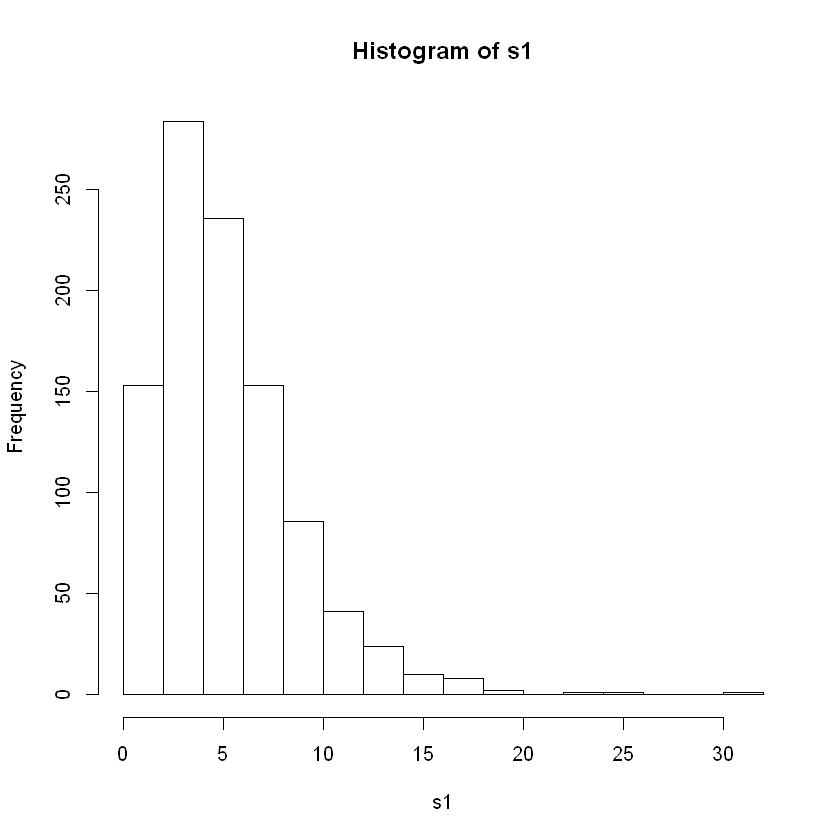

In [36]:
s1 <- replicate(1000,r1(mu,Sigma,100))
hist(s1)
e1 <- ecdf(s1)

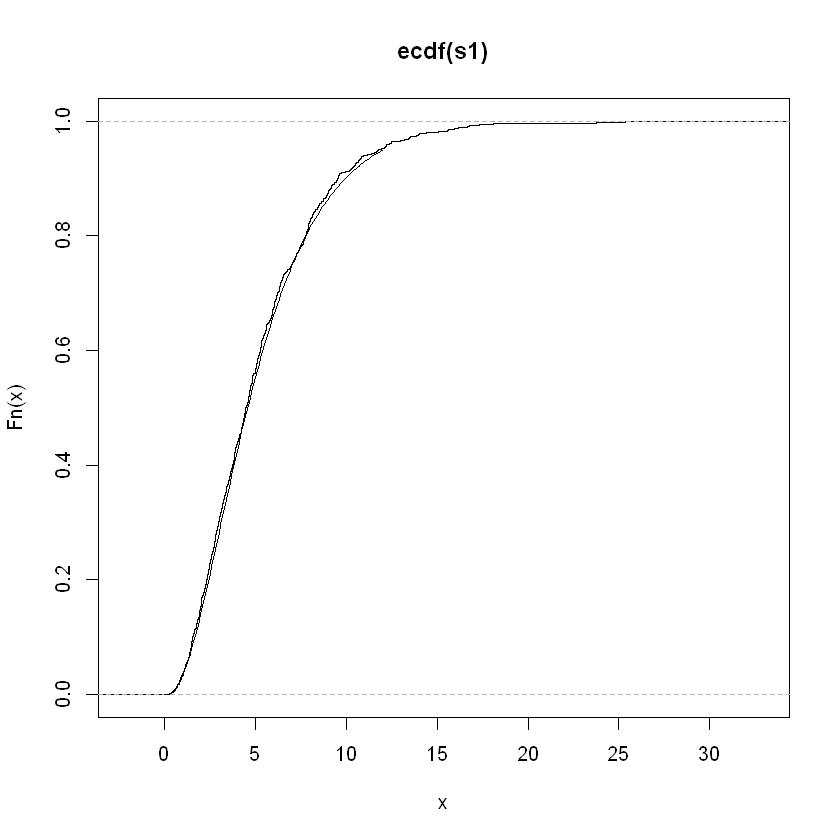

In [37]:
plot(e1)

x <- seq(0,12,0.1)
y <- pTsq(x,5,100-1)

lines(x,y)

In [38]:
r2 <- function(mu, Sigma, n, muH = mu){
    X <- rmultinorm(n,muH,Sigma)
    X0 <- rmultinorm(1,muH,Sigma)
    W <- (X - mu) %*% t(X - mu)
    # W <- (X - muH) %*% t(X - muH) # Is it meanful? I prefer to set another r3 to depict it.
    res <- (n-1) * (t(X0 - mu) %*% solve(W) %*% (X0 - mu))
    return(res)
}

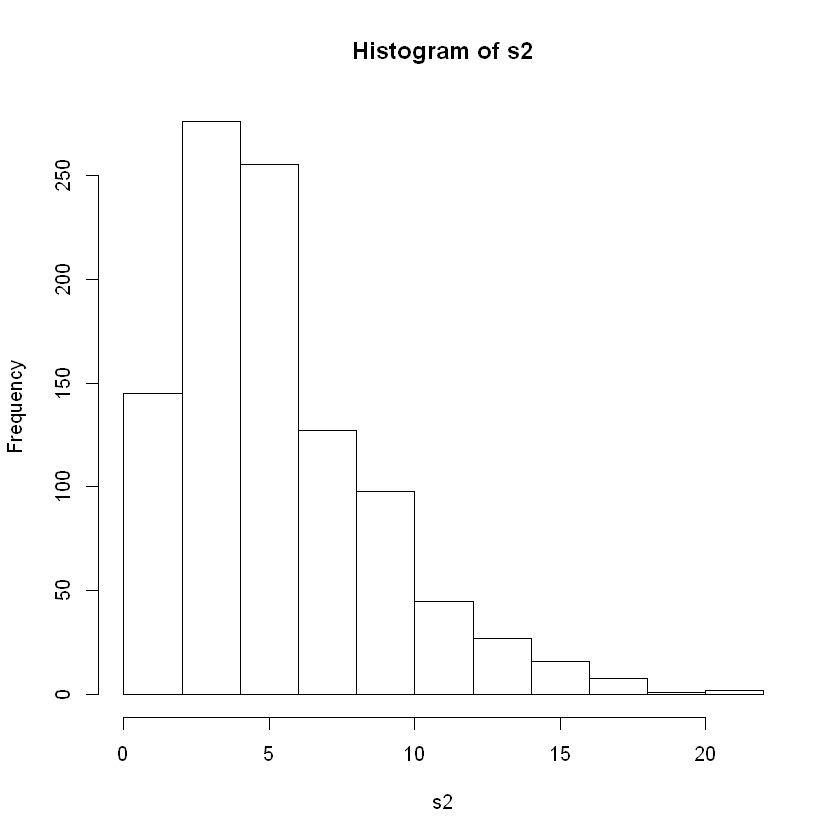

In [40]:
s2 <- replicate(1000,r2(mu,Sigma,100))
hist(s2)
e2 <- ecdf(s2)

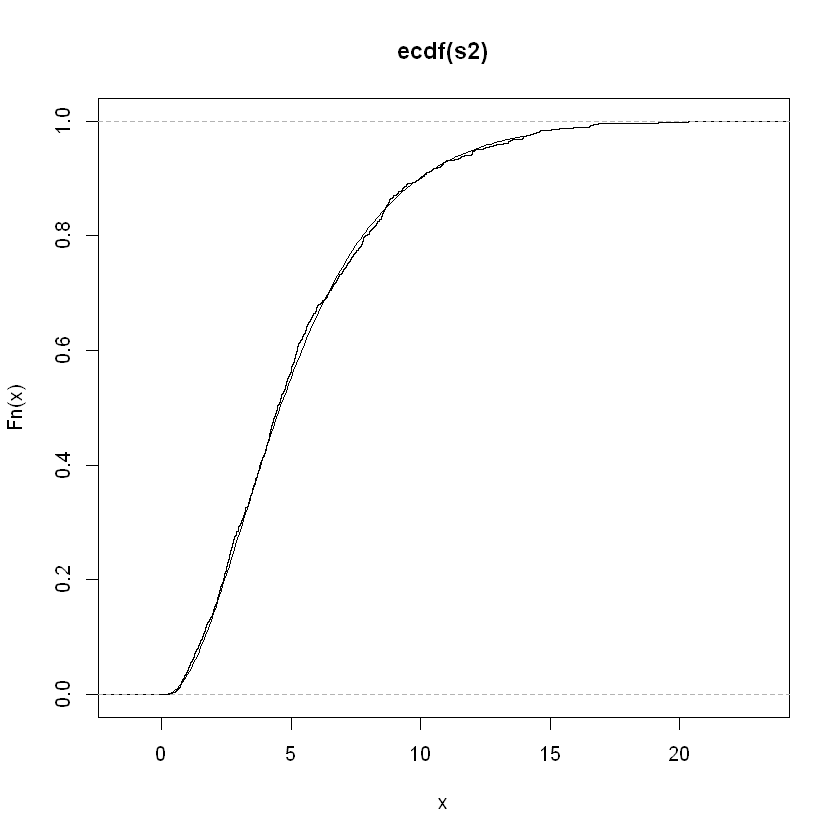

In [41]:
plot(e2)

x <- seq(0,14,0.1)
y <- pTsq(x,5,100)
lines(x,y)

$T^2$分布的似然度低潮在右边（违背假设越厉害也靠右越），我们直接指定其cdf的0.95分位点及右边为拒绝域。

In [42]:
qTsq(0.95,5,100)

[1] 12.02709

In [43]:
qTsq(0.95,5,99)

[1] 12.03749

In [44]:
e1(12.02)

[1] 0.953

In [45]:
e2(12.02)

[1] 0.947

注意
$$
(X_0 - \mu)^T (\frac{1}{n-1} L)^{-1} (X_0 - \mu) = (n-1) (X_0 - \mu)^T L^{-1} (X_0 - \mu)  \sim T^2(p,n-1) \\
$$
中$\mu$是特定统计量固定的一部分，功效函数改变$\mu$的假设时这个值并不变。变的是$X_0$的参数和分布(本来也影响$L$的分布，
但$L$实际不受$\mu$设定的影响)。

这里因为假设空间是$R^5$，我们以$k(1,1,1,1,1)^T$来观察其完整功效函数的一个侧面。

In [46]:
kv <- seq(-1,1,0.05)
rpv <- c()
L.size <- 50
p <- length(mu)
stat.size <- 200

for(k in kv){
    stat <- replicate(stat.size ,r1(mu, Sigma, L.size, muH = k*c(1,1,1,1,1)))
    rp <- mean(stat > qTsq(0.95, p, L.size - 1 ))
    rpv <- c(rpv, rp)
}

In [47]:
rpv

[1] 0.435 0.360 0.315 0.280 0.220 0.190 0.175 0.165 0.185 0.170 0.110 0.100
[13] 0.125 0.100 0.070 0.060 0.040 0.080 0.050 0.030 0.045 0.070 0.030 0.055
[25] 0.070 0.030 0.080 0.085 0.085 0.120 0.100 0.100 0.135 0.190 0.210 0.230
[37] 0.255 0.315 0.295 0.320 0.380

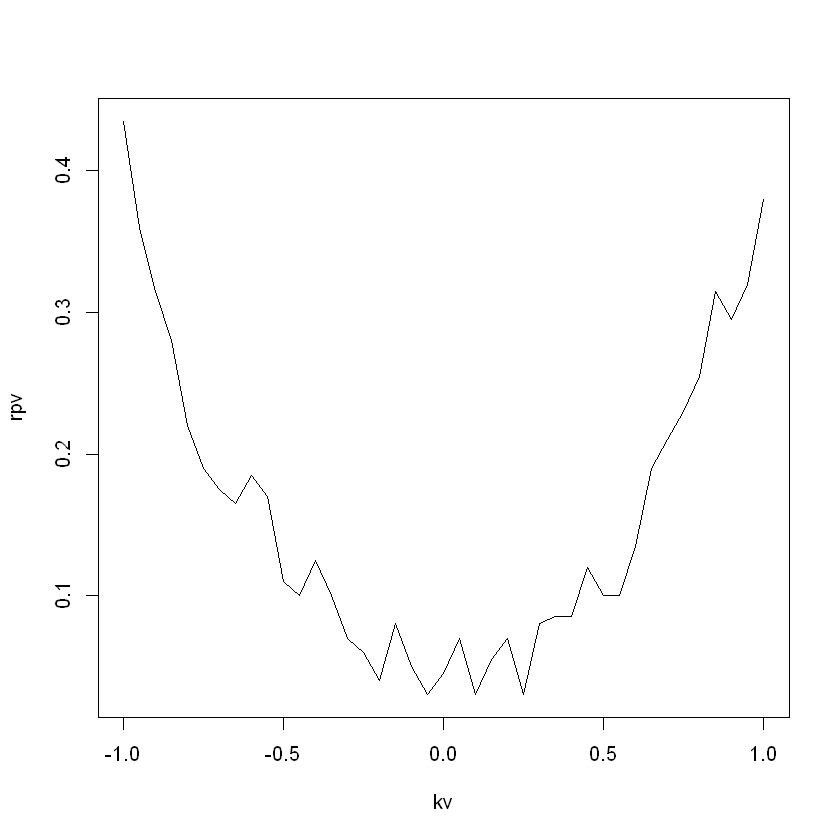

In [48]:
plot(kv,rpv,type="l")

这是L方法的功效函数，看看W方法的功效函数。W方法的一个麻烦是那个$W$矩阵是怎么中心化的，$L$自带用均值中心化。那$W$呢，
用假设的期望吗，这是之前的做法。但把它展开后会发现
$$
T^2 = n (X_0 - \mu)^T W^{-1} (X_0 - \mu)= n (X_0- \mu1^T)^T ((X - \mu1^T) (X - \mu)^T)^{-1} (X_0 - \mu)
$$
改变中间的$\mu$与改变两边的$\mu$一样，实际得到了不同的统计量，不同的统计量间当然不能以功效函数进行比较。
所以按照功效函数的思路，$\mu$就是不变的，变的是$X,X_0,W$的分布。于是$W$在备择假设上变成了不知道什么东西，它并不逼近真实$n\Sigma$，
也不知道这种混乱是放大还是减小了统计量。

In [49]:
kv <- seq(-10,10,0.1)
rpv <- c()
L.size <- 50
p <- length(mu)
stat.size <- 200

for(k in kv){
    stat <- replicate(stat.size ,r2(mu, Sigma, L.size, muH = k*c(1,-1,1,-1,1)))
    rp <- mean(stat > qTsq(0.95, p, L.size - 1 ))
    rpv <- c(rpv, rp)
}

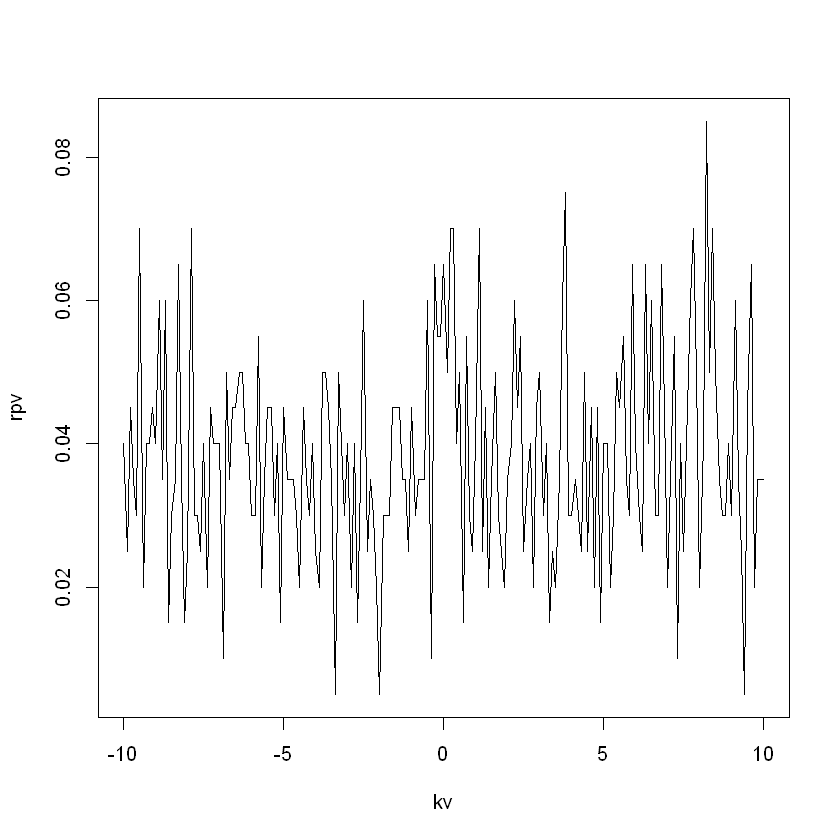

In [50]:
plot(kv,rpv,type="l")

我们发现，起码在这个特定角度上（$k(1,1,1,1,1)^T$），在备择假设上看起来分布和在原假设上的统计量分布没什么区别。
这自然造成了没有差别的，表示这个检验统计量无用的功效函数特征。这也告诉我们只知道原假设下的分布并没有什么卵用，
还要让统计量在备择假设上在拒绝域上有差别才靠谱。
这里没什么差别可能是因为$W$的混乱支配了整个随机性，使得与我们所关心的问题已经没什么关系了。从而使得那种混乱与落入拒绝域“独立”，
就得到了这样的情况。

之前一直用一个估计协方差矩阵以外的变量构造假设检验，是否可以在这里多使用几个样本求均值来让检验更有效呢？
这些均值可以线性放大来获得类似$X_0$的地位。于是我们把样本划成$m$个用于估计协方差矩阵，$n$个用于估计协方差均值如何？

$$
\bar{X} \sim N(\mu,\frac{1}{n} \Sigma) \\
( \sqrt{n} (\bar{X} - \mu)) +\mu \sim N(\mu, \Sigma)
$$

这看上去好像没什么用。因为真只是要一个$N(\mu,\Sigma)$分布的随机向量的话，取第一个就好。其他的不如用于估计协方差矩阵。

当然上述思路好像引来了某种“直接降低方差法”的思考，可以用来考虑均值的意义。我们知道样本均值“降低了”方差，那以下降低方差方法是否合理？

$$
X \sim N(\mu,\sigma^2) \\
\frac{1}{\sqrt{n}} (X - \mu) + \mu \sim N(\mu,\frac{\sigma^2}{n})
$$

相比样本均值，上法为了降低方差使用了参数$\mu$，这并不一定有害，说不定可以用来构造检验统计量，以此还可以用来间接估计均值。
比如对各个参数取值分别构造不同的检验统计量和检验，看其代入样本后是否过于不合理。然后选出最合理的那个。
当然那样标准化后我们发现问题又退化回去了。

假如有一个各分量互相独立的随机向量，经过一个正交矩阵之类的变换后它依然相互独立。于是我们将其分为两部分$A,B$。
其中$A$的任意函数与$B$的任意函数相独立。除了恒定映射外，最令人感兴趣的是增维的变换，比如$A$直接$AA^T$变成了一个比其原本维数还大的随机矩阵。
但显然该矩阵的元依旧与$B$的函数相独立。

感兴趣的另一个问题是，如果一个各分量相互独立的随机向量经变换，秩下降了。是否一定存在原随机向量的某些组合，使得合在一起后秩可以“补全”。

这似乎可以转化为一个矩阵的问题，我们问对于

$$
Y = AX \\
rank(Y) < rank(X) \\
$$

是否存在矩阵$B$，使得

$$
Q = 
\begin{bmatrix}
Y \\
Z
\end{bmatrix}
=
\begin{bmatrix}
A \\
B
\end{bmatrix}
X \\
rank(Q) = rank(X)
$$

这是个纯线性代数问题，即给定一个矩阵$A$，如何补上几行让它行或列满秩。其实并不困难，随便找个基，什么$(1,0,\ldots,0)$，
只要不可由当前矩阵表出（加了可以增秩）就加进去，总可以在某步（最晚最后一步）加到满秩。

知道了这一点，我们发现其实并没有太大帮助。即使把样本协方差矩阵拖长为向量，变换出它的也不是原变量的线性组合，而是二次型，
关于二次型我们有很多结论吗？也许卡方分布那些二次型之间的算一些。总之，我们惊讶的发现$\bar{X}$与$L$独立，虽然有一元版本暗示，
但这还是个十分shock的定理。因为多元函数，除了假设正态分布再利用线性变换下的协方差矩阵的性质外，并没有太好的方法。
起码对于线性变换而言，二次型是一个比较一般的函数。

既然$\bar{X}$与$L$独立，我们可以作
$$
(\bar{X} - \mu) \sqrt{n} + \mu \sim N(\mu,\Sigma)
$$

取代$X_0$的地位

$$
\begin{align}
(n-1) (X_0 - \mu)^T L^{-1} (X_0 - \mu)  
&= (n-1) ((\bar{X} - \mu) \sqrt{n} + \mu - \mu)^T L^{-1} ((\bar{X} - \mu) \sqrt{n} + \mu - \mu) \\ 
&= n (n-1) (\bar{X} - \mu )^T L^{-1} (\bar{X} - \mu) \\ 
&= n (\bar{X} - \mu )^T S^{-1} (\bar{X} - \mu)\\ 
&\sim  T^2(p,n-1)
\end{align}
$$

其中$S = \frac{1}{n-1} L$为样本协方差矩阵

这已经浮现一个检验单总体均值的统计量了。

将$X_0$换为同协方差不同均值两样本

$$
\bar{X}_1 - \bar{X}_2 \sim N(\mu_1 - \mu_2, ( \frac{1}{n_1}+\frac{1}{n_2} )\Sigma) \\
X_0 = \sqrt{\frac{1}{\frac{1}{n_1}+\frac{1}{n_2}}}(\bar{X}_1 - \bar{X}_2) =
\sqrt{\frac{n_1 n_2}{n_1 + n_2}}(\bar{X}_1 - \bar{X}_2) 
\sim N(\mu_1 - \mu_2, \sigma)
$$

$\mu$也换为$\mu_1 - \mu_2$，则得到

$$
(\sqrt{\frac{n_1 n_2}{n_1 + n_2}}(\bar{X}_1 - \bar{X}_2)  - (\mu_1 - \mu_2))^T
S^{-1}
(\sqrt{\frac{n_1 n_2}{n_1 + n_2}}(\bar{X}_1 - \bar{X}_2)  - (\mu_1 - \mu_2))
= \\
\frac{n_1 n_2}{n_1 + n_2} 
((\bar{X}_1 - \bar{X}_2)  - (\mu_1 - \mu_2))^T S^{-1} ((\bar{X}_1 - \bar{X}_2)  - (\mu_1 - \mu_2))
\sim
T^2(p,n_1 + n_2 - 2)
$$

这导出了一个检验两均值是否相等的统计量。

检验多元下两总体均值或单总体均值是否为特定值虽好，但如何比较多总体均值是否相等？可以考虑加总各分量偏离各分量偏均值的效应，
在元假设协方差矩阵相等情况下：

$$
\sum_{i=1}^n \sum_{j=1}^{n_i} (X_{ij} - \bar{X})^T S^{-1} (X_{ij} - \bar{X})
$$

$n$为分类个数$n_i为$i$类中的样本规模，$X_{ij}$为$i$类第$j$个观测，显然假设不成立时该量有偏大的趋势。

这方法看起来不错，然而回忆单元方差分析如何检验这个假设的，单元搞F分布是因为要消掉方差（从假设检验的角度说，
当然这个比形式本身就可以作为一些以比来标准化的统计量的背后分布。）光从假设检验上看，
完全也可以拿样本方差取代方差，然而对于再增加一个扰动后到底生成了什么分布，却没有任何结论。当然也可以给它取个名字，
但既然求比就可以精确绕过这个困难，何乐而不为呢（比较某些非参数检验中就懒得求比了，因为方差是常数）。

我们这里$S$的扰动也造成了困难，在原假设下所有分类同分布。所以可以把它们挤成$(X_E - \mu_E)^T \Sigma^{-1}_E (X_E - \mu)$形式。
增补$X$
$$
X_E=(X_{11},X_{12},\ldots,X_{1n_1},\ldots,X_{21},\ldots,X_{nn_n})^T
$$。
增补$\mu$
$$
\mu_E = (\mu,\mu,\cdots,\mu)^T
$$
共$\sum_{i=1}^n n_i$个分块矩阵$\mu$

增补协方差矩阵$\Sigma$
$$
\Sigma_E = 
\begin{bmatrix}
\Sigma  & 0       & \cdots & 0 \\
0     & \Sigma    & \cdots & 0 \\
\vdots  & \vdots    & \ddots & \vdots \\
0     & 0       & \cdots & \Sigma
\end{bmatrix}
$$

($X_E$里每个$X_{ij}$对应$\Sigma_E$里的一个$\Sigma$，显然所谓向量间相互独立的一个必要条件是这些分块矩阵的交叉项是零矩阵。)

可以把它们平方和再分开，容易看出

$$
(X_E - \mu_E)^T \Sigma^{-1}_E (X_E - \mu_E) \sim \chi^2(\sum_{i=1}^n n_i)
$$

如果$\Sigma$已知，上法可以做一个确定的检验统计量，然而未知（虽然还是知道它们相等）呢？用$S$取代$\Sigma$，
也许吧，反正不服从$\chi^2(\sum_{i=1}^n n_i)$分布。

甚至取比也变得困难了，怎么比掉一个$\Sigma_E$?

于是让我们调整思路，样本离差阵$L = (X - \bar{X}1^T)(X - \bar{X}1^T)^T$可以作为估计协方差矩阵中的一步。
但$W$矩阵原本的形式$(X - \mu1^T)(X - \mu1^T)^T$在$\mu$等于参数$\mu$时服从wishart分布。那如果$\mu$设定错了呢？
某种意义上说,我们正在分析前面说的W方法中那种不知道什么分布的统计量的分布。

$$
(X - (\mu+d)1^T)(X - (\mu+d)1^T)^T = \\
((X - \mu1^T) - d1^T)((X - \mu1^T) - d1^T)^T = \\
(X - \mu1^T)(X - \mu1^T)^T -  (X - \mu1^T) (d1^T)^T -d1^T (X - \mu1^T)^T + d1^T (d1^T)^T \\
$$

可以分解为正确项加上一个固定偏离和两个随机偏移项，其中随机偏移怎么移，如何与正确项相关不好说。也搞不清这是个什么分布。

那么我们能对错误设定后如何变化大致说什么呢？大致上，上面矩阵某种意义上整体变大了（考虑此时若估计协方差矩阵，其自然偏大）。我们来试验一下

In [51]:
Sigma

6.54533815,-1.4662062,2.7825725,0.04841781,1.763875
-1.46620618,2.0173622,-2.2735150,-0.98226865,2.538444
2.78257247,-2.2735150,7.0080074,0.76504822,-1.612551
0.04841781,-0.9822686,0.7650482,4.83426434,-3.665154
1.76387461,2.5384442,-1.6125511,-3.66515356,6.708771


In [52]:
X <- rmultinorm(100,mu,Sigma)

In [53]:
(X - mu) %*% t(X - mu)

592.88798,-191.6912,341.83135,-34.31794,85.51921
-191.69123,254.6958,-297.90885,-116.23908,310.25194
341.83135,-297.9089,829.63393,97.97412,-223.06379
-34.31794,-116.2391,97.97412,594.95124,-467.19859
85.51921,310.2519,-223.06379,-467.19859,739.90760


In [54]:
muH <- c(2,1,0,-1,-2)
(X - muH) %*% t(X - muH)

947.76323,39.55429,308.5588,-292.3649,-208.4314
39.55429,397.22246,-314.5451,-272.1665,109.4687
308.55885,-314.54511,829.6339,114.6104,-189.7913
-292.36487,-272.16650,114.6104,764.2794,-239.6140
-208.43141,109.46873,-189.7913,-239.6140,972.9336


不出所料，不过基本是绝对值意义上的变大，有的格符号逆转了。为了刻画“整体变大”，我们搞一个矩阵函数来对应到一个实数上。

说到矩阵函数，最容易想到的是行列式，这个函数还有体积的几何意义，似乎可能符合我们的需求。试验一下。



In [55]:
det((X - mu) %*% t(X - mu))

[1] 433189145615

In [56]:
det((X - muH) %*% t(X - muH))

[1] 6.81543e+13

起码在这个点上符合我们的要求。于是我们可以换一个想法来收集偏离的效应——我们直接看$L$的分布。在元假设和原假设下所有总体分布一致，
所以我们可以把它们都合并起来估计协方差矩阵或者直接用中间形式$L$，如果$L$整体偏大——或者说$det(L)$偏大，则我们有理由拒绝原假设。
然而显然，这个方法无法区分参数协方差矩阵本身很大和因为偏离均值参数统计量显得很大这两个情况，我们要有一个方法取得一个比较标准。

这让我们把目光移回了方差分解关系。看上去我们上面定义的对象地位类似于三项分解里那个总方差（使用了参数的那个）。
显然我们还可以类似地定义出二项分解（只使用均值的那个）的矩阵来。

组内离差阵
$$
SSL = (X - \bar{X}_l 1^T)(X - \bar{X}_l 1^T)^T
$$

组间离差阵
$$
SSG = (\bar{X}_l - \bar{X}_g 1^T)(\bar{X}_l - \bar{X}_g 1^T)^T
$$

总离差阵
$$
SSS = (X - \bar{X}_g 1^T)(X - \bar{X}_g 1^T)^T
$$

其中

$$
\bar{X}_l = (\bar{X}_1,\bar{X}_1,\ldots,\bar{X}_k,\ldots,\bar{X}_n)
$$

而$\bar{X}_i$是列向量和分块矩阵，是第$i$类内部的均值。每个$X$列根据对应的所处分组确定其对应（减的）在$\bar{X}_l$的$\bar{X}_i$。
（$l,g$是特殊记号，不代表下标。）

$$
\bar{X}_g = (\bar(X),\bar(X),\ldots,\bar(X))
$$

$\bar{X}$为所有样本的直接平均。

写出这些矩阵后,我们当然要考虑有没有类似$SSS = SSG + SSL$这样的关系（也许有些项要加权）。

然后我翻了下书，发现书上写的比我不知道高到哪里去了，实际写成带求和符号的形式就可以完全套用单元方差分解的论证证明之了。
这种异质的东西用矩阵强行黏在一起消除求和符号也不怎么优雅（绝对没在黑卷积网络）。

$$
B = SS(TR) = \sum_{k=1}^r \sum_{j=1}^{n_k} (\bar{X}_k - \bar{X})(\bar{X}_k - \bar{X})^T =
\sum_{k=1}^r n_k (\bar{X}_k - \bar{X})(\bar{X}_k - \bar{X})^T \\
E = SSE = \sum_{k=1}^r \sum_{j=1}^{n_k} (X^{(k)}_j - \bar{X}_k)(X^{(k)}_j - \bar{X}_k)^T \\
W = SST = \sum_{k=1}^r \sum_{j=1}^{n_k} (X^{(k)}_j - \bar{X})(X^{(k)}_j - \bar{X})^T \\
W = B + E
$$

有W方法的前例（原假设下分布明确甚至更加自然，然而备择假设上的没有差异却使其没有卵用）。我们考虑上面这个东西，在备择假设下会如何行为。
显然$E$的分布不会改变，然而$B$的分布却会在偏离所有均值都相等的假设下变得位置偏大（如果只是所有位置都相等的集合内部漂移，分布也是一样的）。
区分参数错误设定和协方差矩阵本身太大方面，$E$矩阵和$B$矩阵都协方差矩阵变大而变大。
于是看上去，完全仿照单元方差分析的比例

$$
\frac{det(B)}{det(E)}
$$

也许可以用来构造一个检验统计量，它可以控制协方差矩阵本身量级的效应同时，又可以保留$det(B)$在备择假设中越陷越深时偏大的性质。

这也许是对的，但它在数值上有显然的困难，正如所见，其在5维，原协方差阵还比较小的情况下就变得太大了。考虑行列式其实是特征值的积。
其实也可以直接拿特征值来衡量矩阵的“大小”，比如说，特征值的和。（当然此法也导出一个数值计算方法，就是分解后挨个计算各特征值的比再积总）

在PCA中，可以证明特征值的和等于原协方差矩阵的迹，某种意义上特征值向量规范地重排了方差的分布。这也直接给出如此定义广义方差的方法，
就是直接把协方差上对角线那些内部方差直接加起来，即trace。

当然也许也可以定义什么矩阵二范数（所有元平方求和）之类的衡量矩阵“大小”。总之我们的（广义方差）定义就是要让$B$矩阵在偏离原假设时在
其分布偏大。同时在原协方差矩阵变大时，$E$和$B$的变化幅度应是一致的。

有趣的是，除了在广义方差这一级要求其在$E$和$B$中变化幅度一致外。我们还可以直接这么构造剔除协方差本身大小的影响。

$$
A = BE^{-1}
$$



In [128]:
decomp <- function(X,group){
    # X is (p,n) matrix, group is n dimention vector
    Xbar <- NULL
    for(g in unique(group)){
        index <- group == g
        ni <- sum(index)
        #Xbari <- mean(X[,index],1)
        Xbari <- apply(X[,index],1,mean)
        Xbar <- cbind(Xbar, matrix(rep(Xbari,ni),nrow(X)))
    }
    #Xbarbar <- matrix(rep(mean(X,1),ncol(X)),nrow(X))
    Xbarbar <- matrix(rep(apply(X,1,mean),ncol(X)),nrow(X))
    B <- (Xbar - Xbarbar) %*% t(Xbar - Xbarbar)
    E <- (X - Xbar) %*% t(X - Xbar)
    W <- (X - Xbarbar) %*% t(X - Xbarbar)
    return(list(B = B, E = E, W = W))
}

In [141]:
X <- rmultinorm(100,mu,Sigma)
group <- c(rep(1,50),rep(2,50))

In [142]:
decomp(X,group)

13.7693750,0.40561512,10.7360225,6.1380179,6.482127
0.4056151,0.01194852,0.3162593,0.1808123,0.190949
10.7360225,0.31625931,8.3709086,4.7858308,5.054133
6.1380179,0.18081233,4.7858308,2.7361637,2.889558
6.4821266,0.19094901,5.0541333,2.8895581,3.051552
469.8541668,-129.5722,265.9229,-0.5552741,107.8166
-129.5722477,195.1378,-230.8017,-105.9188504,257.3718
265.9228854,-230.8017,697.1423,140.1254097,-202.4688
-0.5552741,-105.9189,140.1254,487.9551502,-388.9718
107.8165966,257.3718,-202.4688,-388.9717584,659.0346
483.623542,-129.1666,276.6589,5.582744,114.2987


In [132]:
res <- decomp(X,group)
abs(res$E + res$B - res$W) < 1e-6

TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE


In [159]:
X1 <- rmultinorm(50,c(0,0,0,0,0),Sigma)
X2 <- rmultinorm(50,c(1,-1,1,-1,1),Sigma)

X <- cbind(X1,X2)
group <- c(rep(1,50),rep(2,50))

In [160]:
decomp(X,group)

14.11722,-14.90172,17.58763,-15.84868,22.21654
-14.90172,15.72981,-18.56498,16.72939,-23.45112
17.58763,-18.56498,21.91117,-19.74473,27.67799
-15.84868,16.72939,-19.74473,17.79250,-24.94137
22.21654,-23.45112,27.67799,-24.94137,34.96259
540.20354,-95.08603,134.3095,15.32311,173.7532
-95.08603,218.53547,-219.9226,-110.70643,316.6858
134.30948,-219.92262,645.4418,123.43614,-263.3962
15.32311,-110.70643,123.4361,502.28576,-377.1979
173.75321,316.68578,-263.3962,-377.19793,765.4547
554.3207616,-109.98775,151.8971,-0.5255688,195.9698


In [147]:
    Xbar <- NULL
    for(g in unique(group)){
        index <- group == g
        ni <- sum(index)
        #Xbari <- mean(X[,index],1)
        Xbari <- apply(X[,index],1,mean)
        Xbar <- cbind(Xbar, matrix(rep(Xbari,ni),nrow(X)))
    }
    #Xbarbar <- matrix(rep(mean(X,1),ncol(X)),nrow(X))
    Xbarbar <- matrix(rep(apply(X,1,mean),ncol(X)),nrow(X))
    B <- (Xbar - Xbarbar) %*% t(Xbar - Xbarbar)
    E <- (X - Xbar) %*% t(X - Xbar)
    W <- (X - Xbarbar) %*% t(X - Xbarbar)


In [150]:
Xbar[,c(1:5,95:100)]

-0.4708130,-0.4708130,-0.4708130,-0.4708130,-0.4708130,1.3460755,1.3460755,1.3460755,1.3460755,1.3460755,1.3460755
-0.1045653,-0.1045653,-0.1045653,-0.1045653,-0.1045653,-0.8561357,-0.8561357,-0.8561357,-0.8561357,-0.8561357,-0.8561357
-0.1147881,-0.1147881,-0.1147881,-0.1147881,-0.1147881,1.6222280,1.6222280,1.6222280,1.6222280,1.6222280,1.6222280
0.3266679,0.3266679,0.3266679,0.3266679,0.3266679,-1.2340423,-1.2340423,-1.2340423,-1.2340423,-1.2340423,-1.2340423
-0.6709026,-0.6709026,-0.6709026,-0.6709026,-0.6709026,1.5215467,1.5215467,1.5215467,1.5215467,1.5215467,1.5215467


In [151]:
Xbarbar[,1:3]

0.4376313,0.4376313,0.4376313
-0.4803505,-0.4803505,-0.4803505
0.7537200,0.7537200,0.7537200
-0.4536872,-0.4536872,-0.4536872
0.4253221,0.4253221,0.4253221


In [165]:
n1 = 500
n2 = 500

X1 <- rmultinorm(n1,c(0,0,0,0,0),Sigma)
X2 <- rmultinorm(n2,c(1,-1,1,-1,1),Sigma)

X <- cbind(X1,X2)
group <- c(rep(1,n1),rep(2,n2))

In [166]:
decomp(X,group)

189.2168,-207.0595,272.7254,-207.9187,215.1727
-207.0595,226.5846,-298.4427,227.5249,-235.4630
272.7254,-298.4427,393.0895,-299.6812,310.1367
-207.9187,227.5249,-299.6812,228.4691,-236.4401
215.1727,-235.4630,310.1367,-236.4401,244.6892
6148.6412,-1223.5476,2413.8529,-182.3658,1965.947
-1223.5476,1924.1598,-2202.1118,-933.2169,2527.702
2413.8529,-2202.1118,6935.0342,855.1804,-1835.654
-182.3658,-933.2169,855.1804,4762.8419,-3649.829
1965.9475,2527.7017,-1835.6541,-3649.8286,6768.810
6337.8580,-1430.607,2686.5783,-390.2845,2181.120


In [167]:
n1 = 500
n2 = 500

X1 <- rmultinorm(n1,c(0,0,0,0,0),Sigma)
X2 <- rmultinorm(n2,100*c(1,-1,1,-1,1),Sigma)

X <- cbind(X1,X2)
group <- c(rep(1,n1),rep(2,n2))

In [168]:
decomp(X,group)

2493579,-2493053,2490786,-2499582,2502758
-2493053,2492527,-2490261,2499055,-2502230
2490786,-2490261,2487997,-2496783,2499955
-2499582,2499055,-2496783,2505600,-2508783
2502758,-2502230,2499955,-2508783,2511971
6384.4060,-1446.4524,2917.6051,259.4365,1627.768
-1446.4524,1934.8173,-2225.9848,-911.7195,2405.908
2917.6051,-2225.9848,6965.0758,840.7101,-1490.228
259.4365,-911.7195,840.7101,5018.5749,-3564.057
1627.7682,2405.9079,-1490.2282,-3564.0567,6432.858
2499963,-2494499,2493704,-2499323,2504386


In [169]:
n1 = 500
n2 = 500

X1 <- rmultinorm(n1,c(0,0,0,0,0),10*Sigma)
X2 <- rmultinorm(n2,100*c(1,-1,1,-1,1),10*Sigma)

X <- cbind(X1,X2)
group <- c(rep(1,n1),rep(2,n2))

In [171]:
decomp(X,group)

2477256,-2483501,2485577,-2494465,2493168
-2483501,2489761,-2491842,2500753,-2499453
2485577,-2491842,2493925,-2502843,2501542
-2494465,2500753,-2502843,2511793,-2510487
2493168,-2499453,2501542,-2510487,2509182
62521.983,-13452.74,26375.14,2642.252,17050.71
-13452.738,19963.86,-22494.72,-10486.817,25890.78
26375.137,-22494.72,70417.41,9477.670,-17449.73
2642.252,-10486.82,9477.67,48002.032,-35840.47
17050.715,25890.78,-17449.73,-35840.467,66734.31
2539778,-2496954,2511952,-2491823,2510219


正如所预期的，$E$矩阵分布在备择假设上不变，而在$\Sigma$本身变大时，$E$也能相应变化。我们模拟看看迹（此时也是特征值和）比统计量的分布。

In [176]:
experiment <- function(n1,n2,mu1,mu2,Sigma){
    #n1 = 500
    #n2 = 500

    X1 <- rmultinorm(n1, mu1, Sigma)
    X2 <- rmultinorm(n2, mu2, Sigma)

    X <- cbind(X1, X2)
    group <- c(rep(1,n1),rep(2,n2))
    
    d <- decomp(X,group)
    return(sum(diag(d$B))/sum(diag(d$E)))
}

In [191]:
res1 <- replicate(1000, experiment(50, 50, c(0,0,0,0,0), 10 * c(1,-1,1,-1,1), Sigma))
res2 <- replicate(1000, experiment(50, 50, c(0,0,0,0,0), 10 * c(1,-1,1,-1,1), 1/10 * Sigma))
res3 <- replicate(1000, experiment(50, 50, c(0,0,0,0,0), 10 * c(1,-1,1,-1,1), 10 *  Sigma))

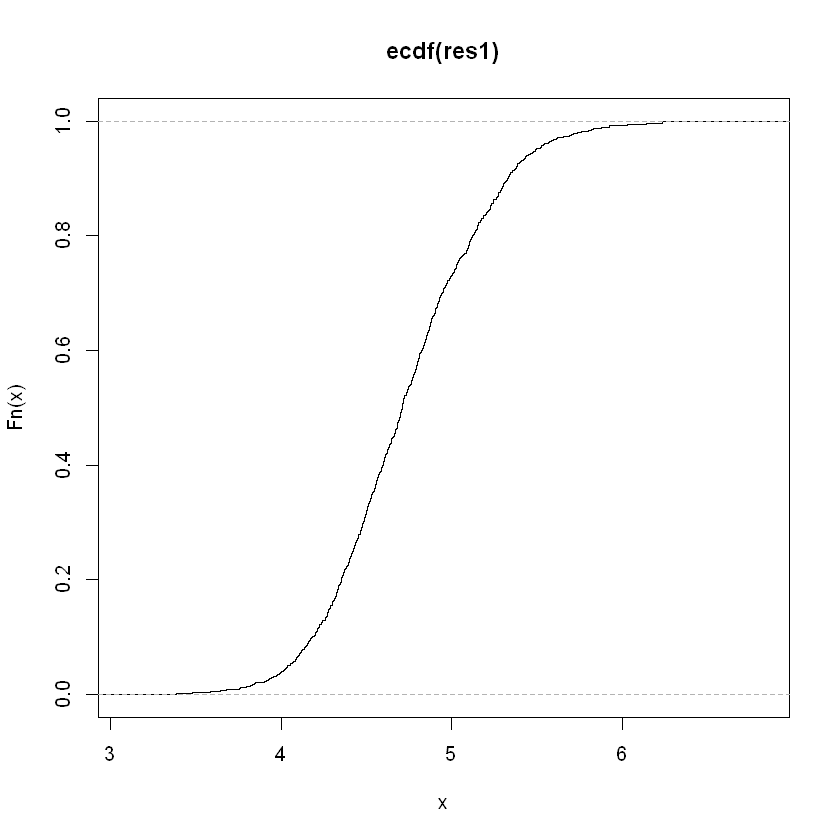

In [192]:
plot(ecdf(res1))
lines(ecdf(res2))
lines(ecdf(res3))

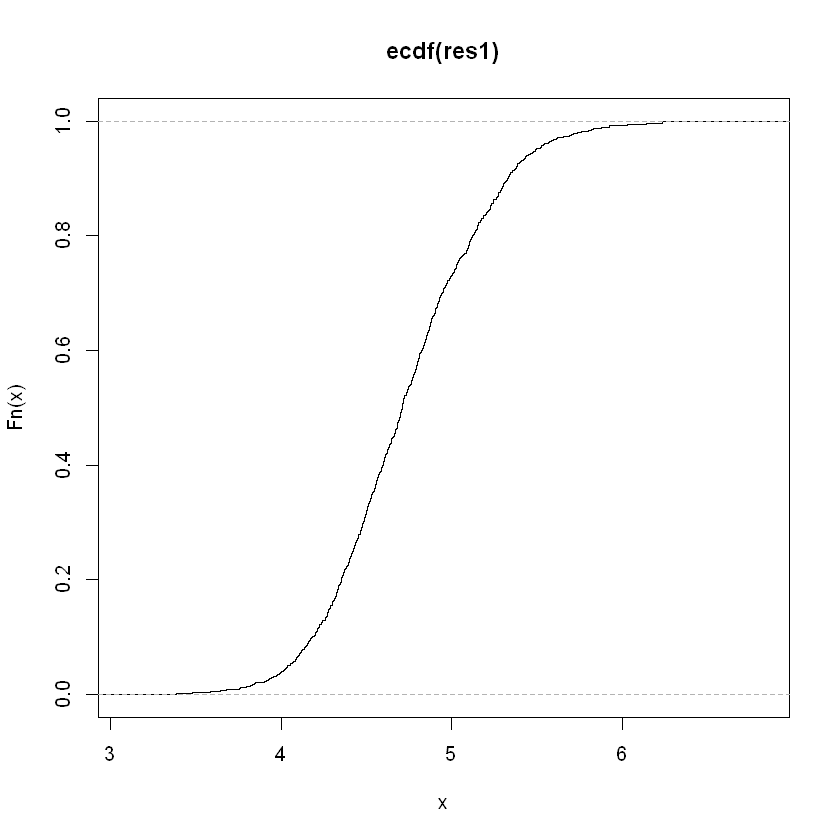

In [193]:
plot(ecdf(res1))


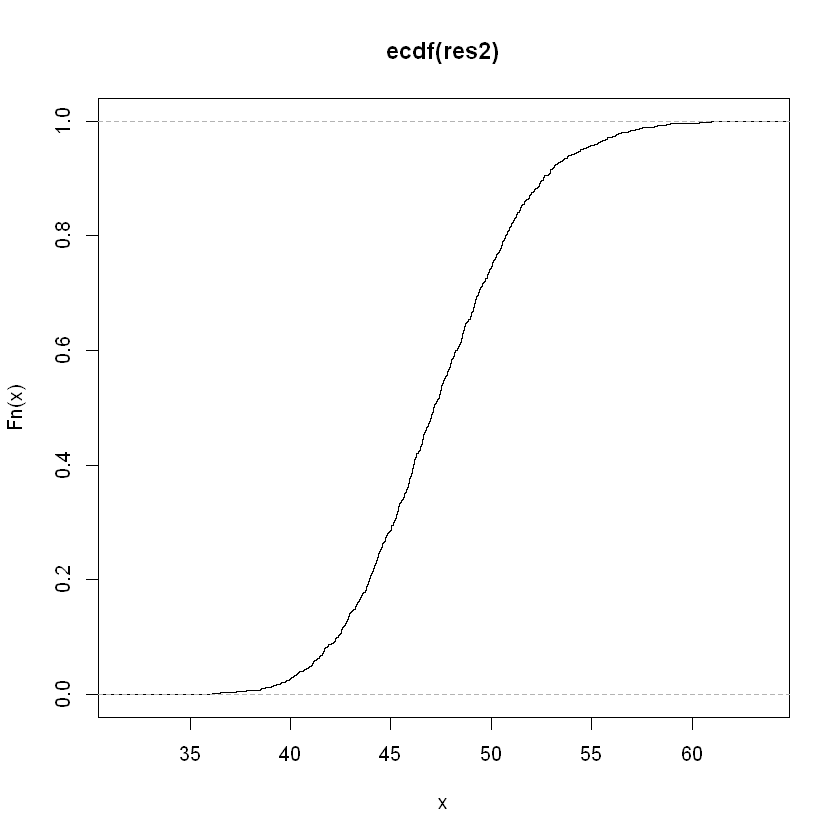

In [194]:
plot(ecdf(res2))

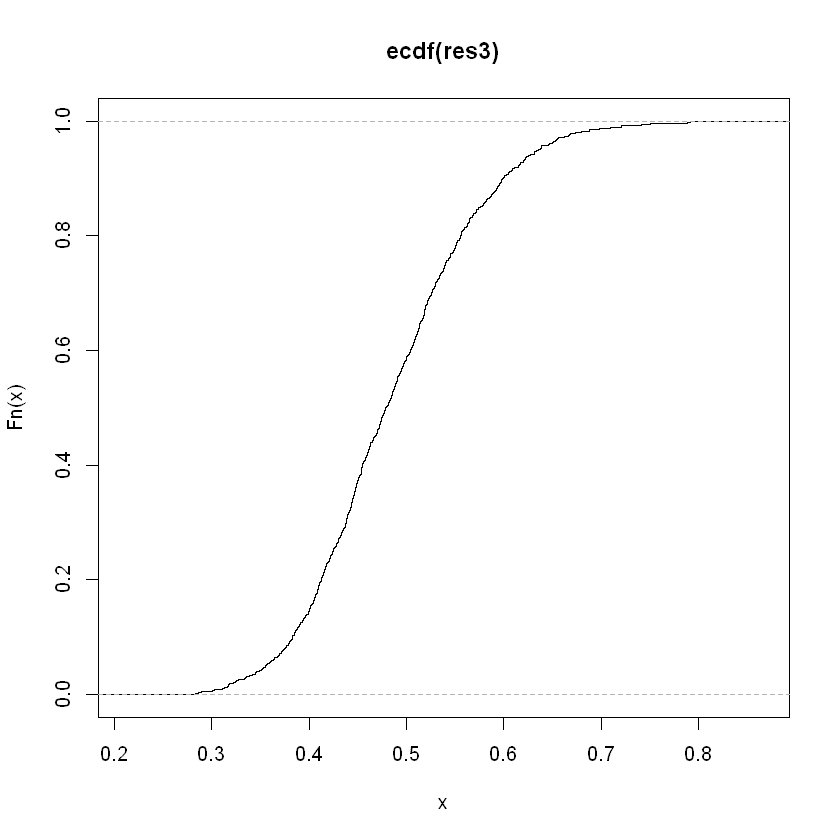

In [195]:
plot(ecdf(res3))

In [217]:
res1 <- replicate(1000, experiment(50, 50, c(0,0,0,0,0), 0 * c(1,-1,1,-1,1), Sigma))
res2 <- replicate(1000, experiment(50, 50, c(0,0,0,0,0), 0 * c(1,-1,1,-1,1), 1/10 * Sigma))
res3 <- replicate(1000, experiment(50, 50, c(0,0,0,0,0), 00 * c(1,-1,1,-1,1), 10 *  Sigma))

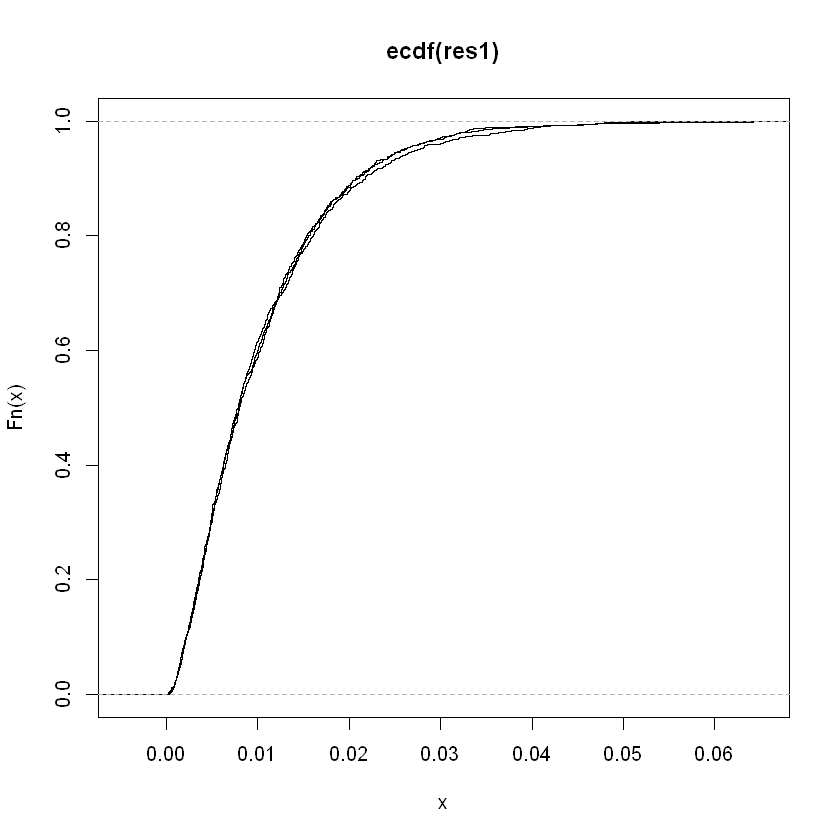

In [218]:
plot(ecdf(res1))
lines(ecdf(res2))
lines(ecdf(res3))

In [207]:
experiment2 <- function(n1,n2,mu1,mu2,Sigma){

    X1 <- rmultinorm(n1, mu1, Sigma)
    X2 <- rmultinorm(n2, mu2, Sigma)

    X <- cbind(X1, X2)
    group <- c(rep(1,n1),rep(2,n2))
    
    d <- decomp(X,group)
    A <- d$B %*% solve(d$E)
    return(sum(diag(A)))
}

In [219]:
res1 <- replicate(1000, experiment2(50, 50, c(0,0,0,0,0), 10 * c(1,-1,1,-1,1), Sigma))
res2 <- replicate(1000, experiment2(50, 50, c(0,0,0,0,0), 10 * c(1,-1,1,-1,1), 1/10 * Sigma))
res3 <- replicate(1000, experiment2(50, 50, c(0,0,0,0,0), 10 * c(1,-1,1,-1,1), 10 *  Sigma))
res4 <- replicate(1000, experiment2(50, 50, c(0,0,0,0,0), 10 * c(1,-1,1,-1,1), 100 *  Sigma))

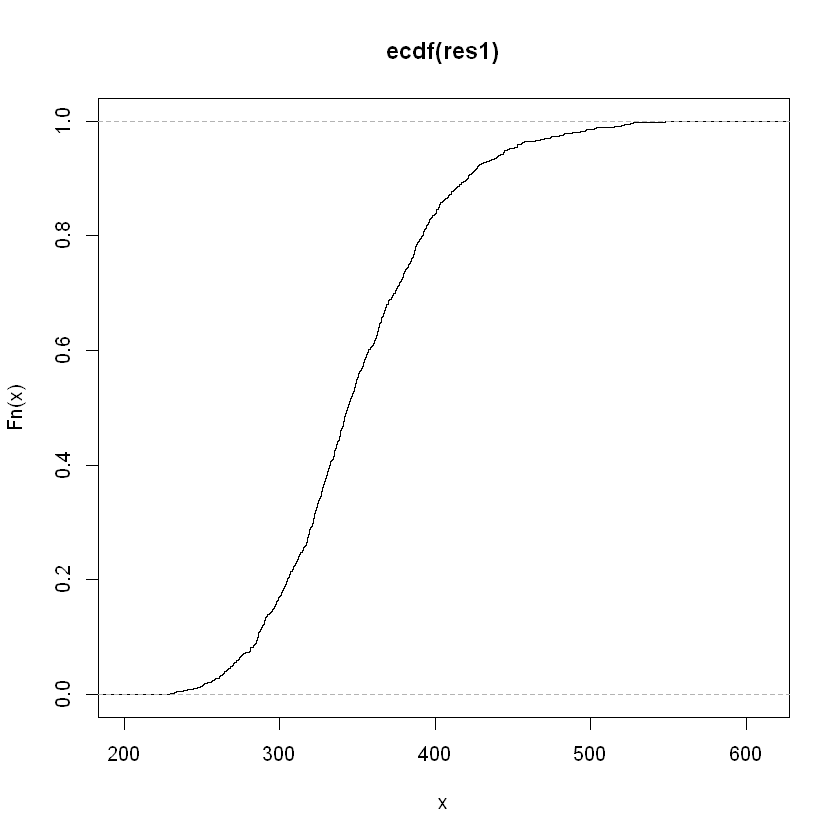

In [220]:
plot(ecdf(res1))

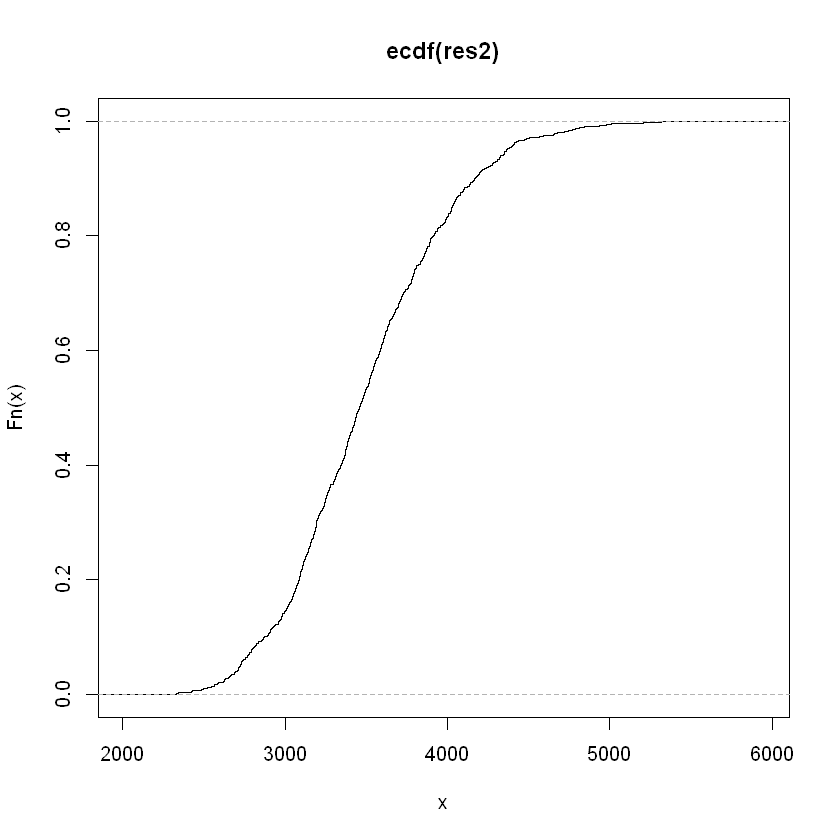

In [221]:
plot(ecdf(res2))

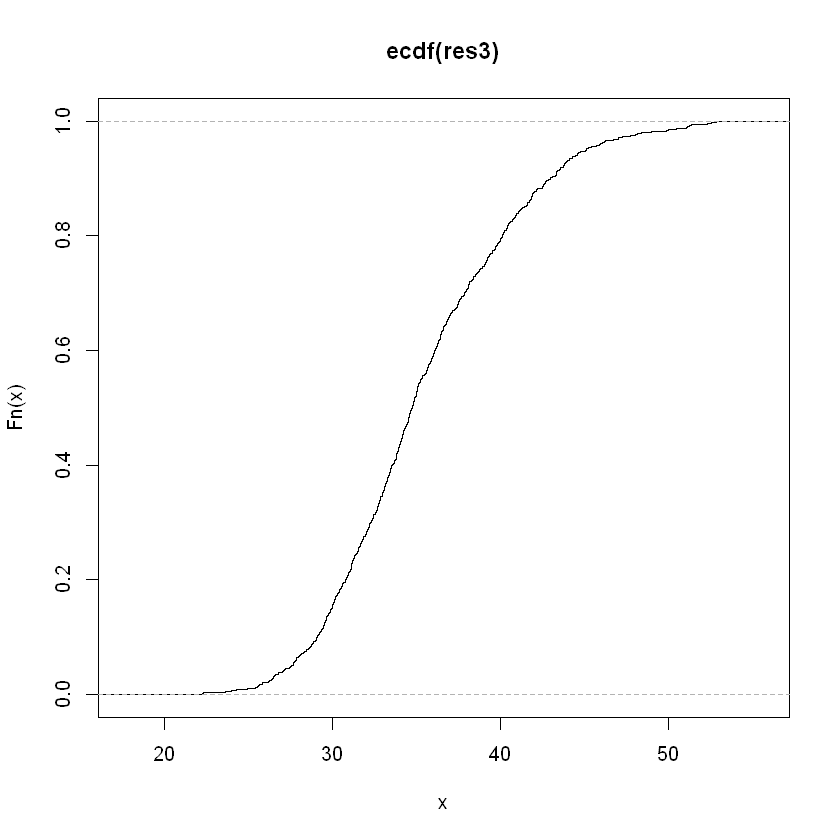

In [222]:
plot(ecdf(res3))

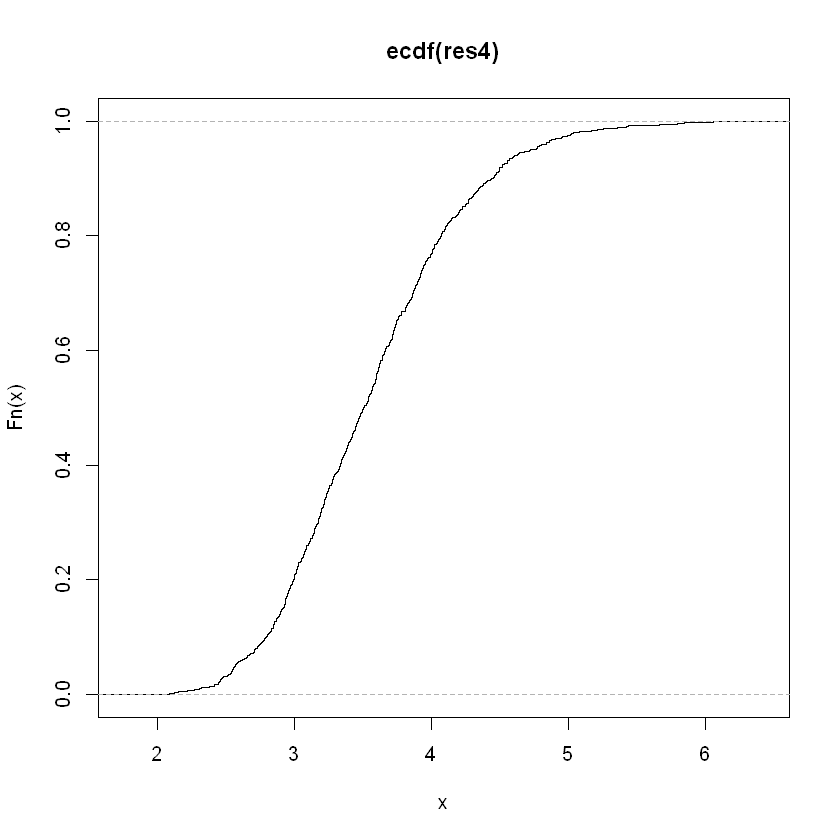

In [223]:
plot(ecdf(res4))

In [213]:
res1 <- replicate(1000, experiment2(50, 50, c(0,0,0,0,0), 0 * c(1,-1,1,-1,1), Sigma))
res2 <- replicate(1000, experiment2(50, 50, c(0,0,0,0,0), 0 * c(1,-1,1,-1,1), 1/10 * Sigma))
res3 <- replicate(1000, experiment2(50, 50, c(0,0,0,0,0), 0 * c(1,-1,1,-1,1), 10 *  Sigma))

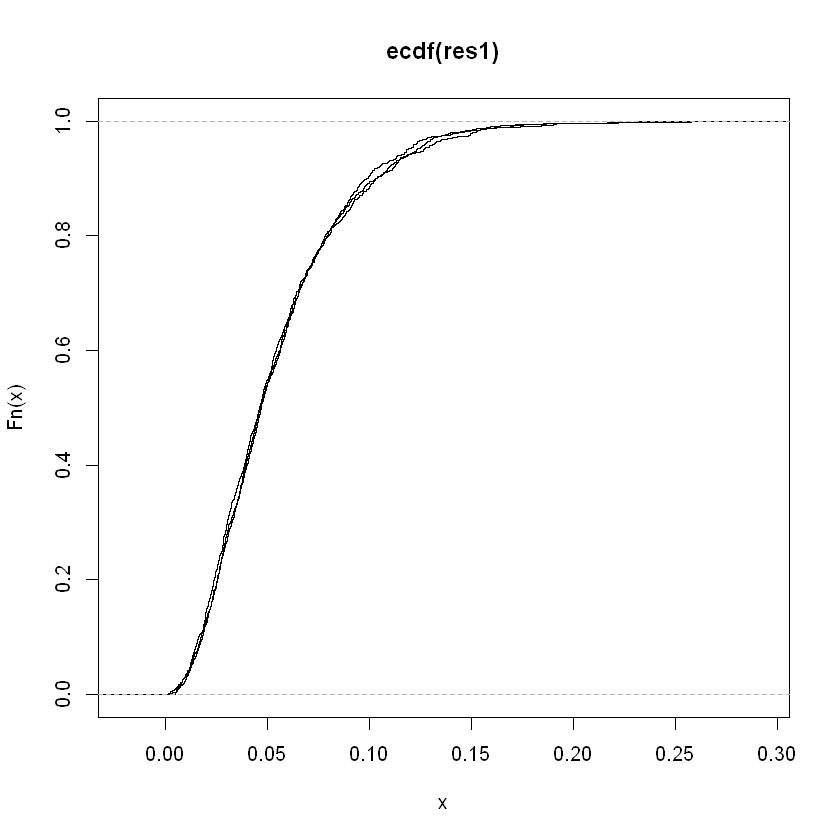

In [216]:
plot(ecdf(res1))
lines(ecdf(res2))
lines(ecdf(res3))

我们发现两种方法（取$B,E$迹比与取$BE^{-1}$迹）方法在原假设下，在各尺度下不变。这很好，显然只取$B$的迹看就无法做到这个不变性了。
然而这个不变性并不能延续到备择假设上，也就是说当观测到一个偏大的取值时，这可能是一个偏小的协方差矩阵带来的。或者说如果协方差矩阵偏大，
则统计量值都偏小（某种意义上这正是我们期望的，因为如果均值差异不变，协方差矩阵变大，那固定的差异只会越来越难分辨出来。
这体现了统计量的分布趋近于原假设成立下的分布。）。总而言之，期望本身差异化产生统计量偏大，期望本身的差异还会辅助影响协方差变化产生的差异，
如果期望本身没差异，协方差变化也不对统计量分布产生影响，如果有，则协方差越大越将统计量偏小，并趋近于期望无差别的分布。

In [225]:
res1 <- replicate(1000, experiment2(50, 50, c(0,0,0,0,0), 0 * c(1,-1,1,-1,1), Sigma))
res2 <- replicate(1000, experiment2(50, 50, c(0,0,0,0,0), 0 * c(1,-1,1,-1,1), Sigma2))
res3 <- replicate(1000, experiment2(50, 50, c(0,0,0,0,0), 0 * c(1,-1,1,-1,1), 100 *  Sigma))

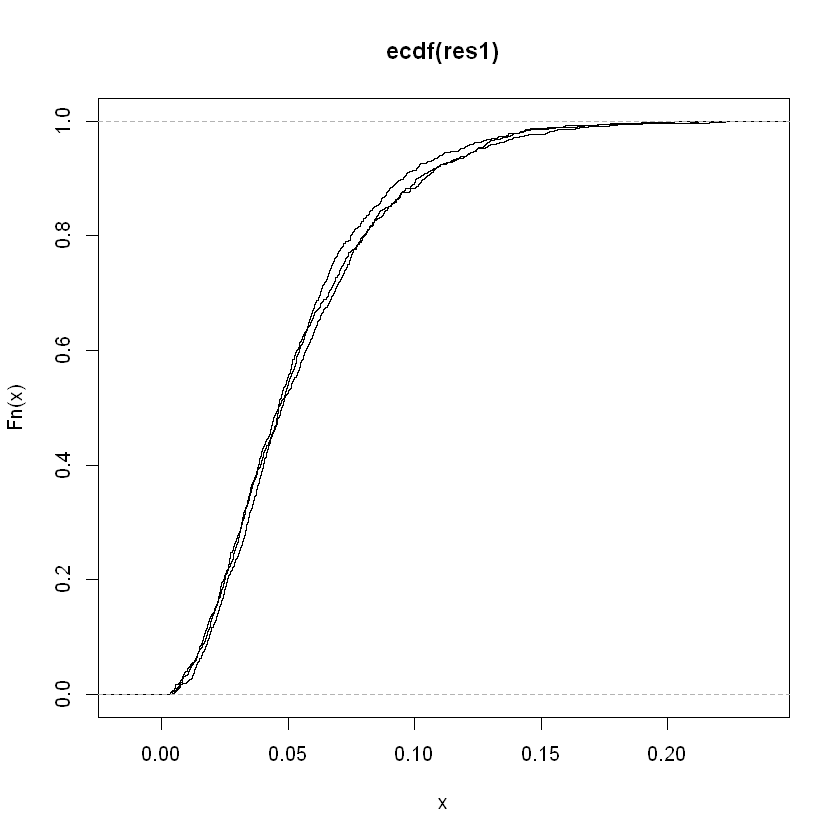

In [226]:
plot(ecdf(res1))
lines(ecdf(res2))
lines(ecdf(res3))

In [227]:
res1 <- replicate(1000, experiment(50, 50, c(0,0,0,0,0), 0 * c(1,-1,1,-1,1), Sigma))
res2 <- replicate(1000, experiment(50, 50, c(0,0,0,0,0), 0 * c(1,-1,1,-1,1), Sigma2))
res3 <- replicate(1000, experiment(50, 50, c(0,0,0,0,0), 0 * c(1,-1,1,-1,1), 100 *  Sigma))

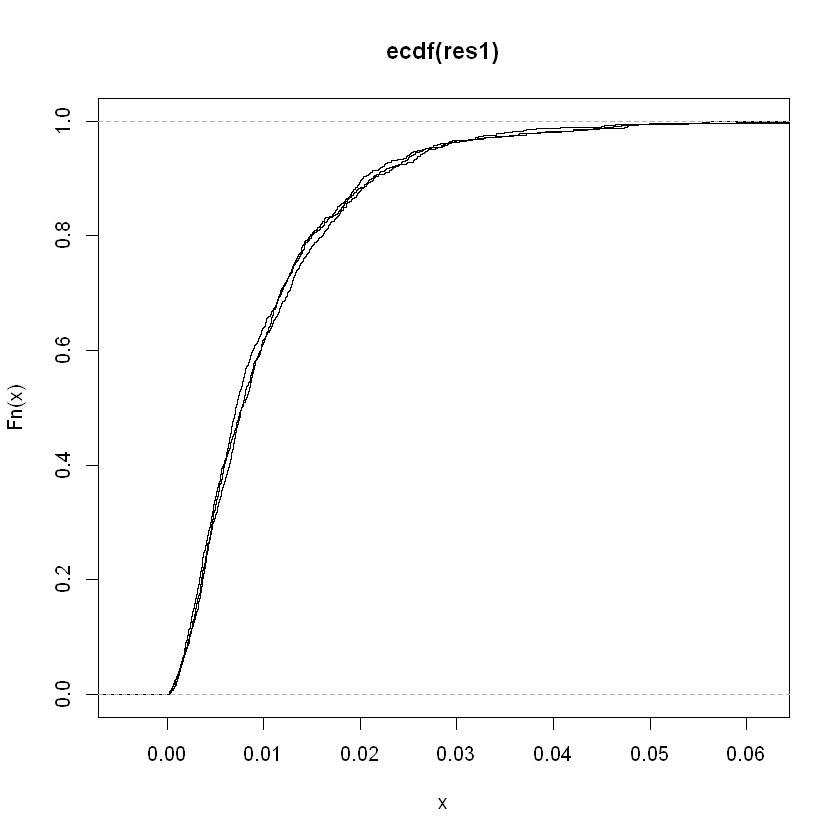

In [228]:
plot(ecdf(res1))
lines(ecdf(res2))
lines(ecdf(res3))

于是我们验证了两个统计量在原假设下对同一个$\Sigma$下不同尺度$k\Sigma$同分布，还对一般不同的$\Sigma$也同分布。
如此，如果我们要研究它们原假设成立下的抽样分布，可以拿掉协方差矩阵的信息，虽然这一信息对wishart矩阵来说是有意义的。

比如也许我们可以上面讨论过的$tr(BE^{-1})$的分布，这个统计量叫Hotelling-Lawley统计量，
我们可以通过对其分布定义为$HL(p,n_,1,n_2)$来假装解决了这一问题。

组织各个特征值还有全部加起来或者乘起来以外的方式，比如似然比原则推导出的wilks lambda统计量

$$
\Lambda = \frac{|E|}{|B + E|} = \frac{|E|}{|W|} = \prod_{i=1}^p \frac{1}{1+\lambda_i} \sim \Lambda(p,n - k, k - 1) 
$$

这个统计量虽然看上去像方差分析格式，甚至那几个参数填上后更像，但其实差的还蛮远。比如组内离差阵放到了上面，单元方差分析是放到了下面，
而且分子分母也不是独立的，分母不是看上去应该是的组间离差阵，而是总离差阵。

那个$\Lambda(p,n_1,n_2)$就是wilks分布。$p$是单个随机向量观测的维数或属性数，$k$是分组数，$n$是总观测向量数$n = \sum_{i=1}^k n_i$。

注意$\Lambda(p,n-k,k-1)$比较起F分布的$F(k-1,n-k)$可能以为只是单变量方差分析把组间误差放在上面，组内误差放到下面的的顺序倒过来的差别。
虽然$n-k$,$k-1$的确还是指组内组间离差（wishart矩阵的那个$n$）的自由度。然而除了把组内离差放到上面以外，放到下面的也不是组间离差，
而是总离差。这种记法容易给人一种总离差好像是$n-k$自由度的错觉。其实总离差是$k-1+n-k = n-1$自由度的。

In [ ]:
,